# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import openweathermapy.core as owm
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
 #settings for the wrapper to call it 
settings = {'units':'metric','appid': api_key}
#empty list that we can populate with the cities that are can be found in the weather api
cities_weather=[]
#start the data retrival for all the cities saved in cities
print("Starting Data Retrival")
print("----------------------")
i=1
for city in cities:
    try:
        cities_weather.append(owm.get_current(city,**settings))
        print(f"Processing record {i} of {len(cities)} | {city}")
    #to get pass not found cities
    except:
        print(f'City {city} not found... Skipping')
    
    
    i+=1
len(cities_weather)

Starting Data Retrival
----------------------
Processing record 1 of 634 | elko
Processing record 2 of 634 | busselton
Processing record 3 of 634 | vaini
Processing record 4 of 634 | san juan
Processing record 5 of 634 | severo-yeniseyskiy
Processing record 6 of 634 | victoria
Processing record 7 of 634 | vestmannaeyjar
Processing record 8 of 634 | keffi
Processing record 9 of 634 | rikitea
Processing record 10 of 634 | malanje
Processing record 11 of 634 | esperance
City cam pha not found... Skipping
City amderma not found... Skipping
Processing record 14 of 634 | canto do buriti
Processing record 15 of 634 | kruisfontein
Processing record 16 of 634 | mahebourg
Processing record 17 of 634 | samfya
City grand river south east not found... Skipping
Processing record 19 of 634 | port alfred
Processing record 20 of 634 | qaanaaq
Processing record 21 of 634 | mataura
Processing record 22 of 634 | zhoucheng
Processing record 23 of 634 | nekhayevskiy
Processing record 24 of 634 | talas
Proce

City kamenskoye not found... Skipping
Processing record 210 of 634 | harrow
Processing record 211 of 634 | gizo
Processing record 212 of 634 | udayagiri
Processing record 213 of 634 | touros
Processing record 214 of 634 | broken hill
City svetlyy not found... Skipping
Processing record 216 of 634 | seddon
Processing record 217 of 634 | lompoc
Processing record 218 of 634 | napier
Processing record 219 of 634 | tshikapa
Processing record 220 of 634 | saint anthony
Processing record 221 of 634 | sao filipe
Processing record 222 of 634 | bandarbeyla
Processing record 223 of 634 | codrington
Processing record 224 of 634 | namibe
Processing record 225 of 634 | buala
Processing record 226 of 634 | severo-kurilsk
Processing record 227 of 634 | sendafa
Processing record 228 of 634 | havelock
Processing record 229 of 634 | ipilan
Processing record 230 of 634 | borogontsy
City bargal not found... Skipping
Processing record 232 of 634 | mount isa
Processing record 233 of 634 | kazachinskoye
Proce

Processing record 416 of 634 | kisangani
Processing record 417 of 634 | nurota
Processing record 418 of 634 | yatou
Processing record 419 of 634 | salta
Processing record 420 of 634 | kutna hora
Processing record 421 of 634 | ruteng
Processing record 422 of 634 | hastings
Processing record 423 of 634 | kampong thum
Processing record 424 of 634 | malinovoye ozero
Processing record 425 of 634 | okmulgee
Processing record 426 of 634 | wanxian
Processing record 427 of 634 | nalut
Processing record 428 of 634 | laguna
Processing record 429 of 634 | lasa
Processing record 430 of 634 | eenhana
Processing record 431 of 634 | talnakh
City shchelyayur not found... Skipping
Processing record 433 of 634 | qingquan
Processing record 434 of 634 | shrewsbury
Processing record 435 of 634 | iwanai
Processing record 436 of 634 | linxia
City dinsor not found... Skipping
Processing record 438 of 634 | tholen
Processing record 439 of 634 | bud
Processing record 440 of 634 | high level
Processing record 441

Processing record 621 of 634 | ahuimanu
Processing record 622 of 634 | taupo
Processing record 623 of 634 | pombas
Processing record 624 of 634 | kirkuk
Processing record 625 of 634 | lusambo
Processing record 626 of 634 | tafalla
Processing record 627 of 634 | calabozo
Processing record 628 of 634 | sawankhalok
Processing record 629 of 634 | sao felix do xingu
Processing record 630 of 634 | tabou
Processing record 631 of 634 | zhigansk
Processing record 632 of 634 | ursulo galvan
Processing record 633 of 634 | loiza
Processing record 634 of 634 | khelyulya


576


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [58]:
#information needed, list to recall from when using wrapper
summary = ['name','clouds.all','sys.country','main.humidity','coord.lat','coord.lon',
          'main.temp_max','wind.speed']
data = [cities_weather[0](*summary)]
weather_data = [cities_weather[i](*summary) for i in range(len(cities_weather))]
data_dict = {'City':[weather_data[i][0] for i in range (len(weather_data))],
             'Cloudiness':[weather_data[i][1] for i in range (len(weather_data))],
             'Country':[weather_data[i][2] for i in range (len(weather_data))],
             'Humidity':[weather_data[i][3] for i in range (len(weather_data))],
             'Lat':[weather_data[i][4] for i in range (len(weather_data))],
             'Lng':[weather_data[i][5] for i in range (len(weather_data))],
             'Max Temp':[weather_data[i][6] for i in range (len(weather_data))],
             'Wind Speed':[weather_data[i][7] for i in range (len(weather_data))],
            }
             
weather_df = pd.DataFrame(data_dict)
weather_df.head()

#Save dataframe as csv
#pd.DataFrame.to_csv(city_data_df, 'city_data.csv')

,City,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Elko,90,US,59,40.83,-115.76,1.00,4.10
1,Busselton,0,AU,29,-33.64,115.35,29.44,1.97
2,Vaini,100,IN,90,15.34,74.49,20.30,6.22
3,San Juan,94,AR,46,-31.54,-68.53,24.80,6.59
4,Severo-Yeniseyskiy,100,RU,96,60.37,93.04,-14.11,1.05


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

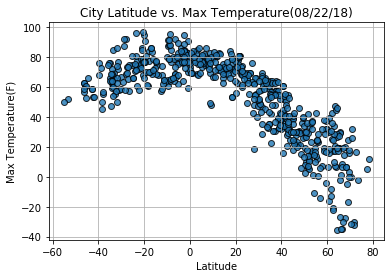

In [60]:
fig1=plt.scatter(weather_df['Lat'],weather_df['Max Temp']*1.8+32,alpha='0.8', edgecolors= 'black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.grid(True)
plt.title('City Latitude vs. Max Temperature(08/22/18)')
plt.savefig('City Latitude vs. Max Temperature.png')

#### Latitude vs. Humidity Plot

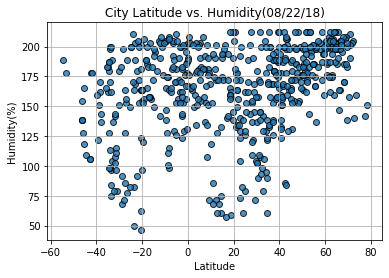

In [61]:
fig2=plt.scatter(weather_df['Lat'],weather_df['Humidity']*1.8+32,alpha='0.8', edgecolors= 'black')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid(True)
plt.title('City Latitude vs. Humidity(08/22/18)')
plt.savefig('City Latitude vs. Humidity.png')

#### Latitude vs. Cloudiness Plot

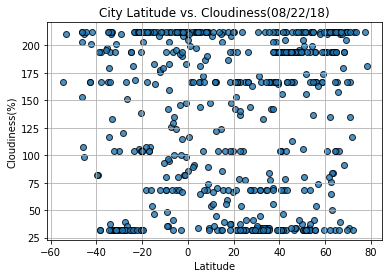

In [62]:
fig3=plt.scatter(weather_df['Lat'],weather_df['Cloudiness']*1.8+32,alpha='0.8', edgecolors= 'black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid(True)
plt.title('City Latitude vs. Cloudiness(08/22/18)')
plt.savefig('City Latitude vs. Cloundiness.png')

#### Latitude vs. Wind Speed Plot

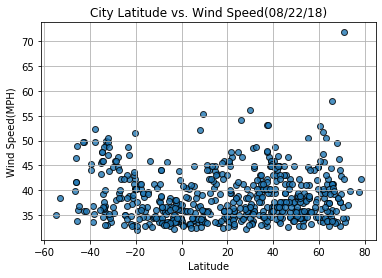

In [63]:
fig4=plt.scatter(weather_df['Lat'],weather_df['Wind Speed']*1.8+32,alpha='0.8', edgecolors= 'black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(MPH)')
plt.grid(True)
plt.title('City Latitude vs. Wind Speed(08/22/18)')
plt.savefig('City Latitude vs. Wind Speed.png')